KL-DIV Loss & bcewithlogits
a = lambda_1 * kl_loss(torch.log(sigmoid(output)), sigmoid(target))  # kl-div between models' logits
b = lambda_2 * bce_with_logits_loss(x_attention, target_off_patches)  # turn off patches
loss = a + b

In [8]:
import torch
from torch import nn
from torch.functional import F
sigmoid = nn.Sigmoid()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


def plot_sorted_vector(vector, apply_sigmoid=False):
    if apply_sigmoid:
        vector = sigmoid(vector)
    plt.plot(sorted(vector))
    plt.show()

In [9]:
t = torch.tensor([3.7550e+00, 0.0000e+00, 1.7172e+00, 1.8264e+00, 2.5139e+00, 6.3451e-01,
        2.5755e+00, 2.3774e+00, 3.4629e+00, 8.1530e-01, 0.0000e+00, 7.1727e-01,
        2.5322e+00, 1.3235e+00, 1.0982e+00, 1.9736e+00, 2.6887e+00, 1.1591e+00,
        2.3042e+00, 8.8976e-01, 6.8535e-01, 4.2395e-01, 6.1011e-01, 1.0025e+00,
        1.8117e+00, 3.2034e+00, 2.3725e+00, 0.0000e+00, 4.7430e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.3175e+00, 1.7848e+00, 0.0000e+00, 3.5469e+00,
        1.3300e+00, 1.3363e+00, 1.4480e+00, 0.0000e+00, 2.5737e-01, 1.9658e+00,
        1.5113e+00, 2.5068e+00, 4.7565e+00, 0.0000e+00, 7.9184e-01, 2.2310e+00,
        2.2449e+00, 4.1800e+00, 2.1352e+00, 9.1627e-01, 0.0000e+00, 3.6455e-01,
        1.8126e+00, 1.5178e+00, 2.2218e+00, 6.6169e-01, 0.0000e+00, 0.0000e+00,
        4.9273e+00, 0.0000e+00, 0.0000e+00, 1.7613e+00, 3.3723e+00, 0.0000e+00,
        1.9985e+00, 1.6049e+00, 8.3808e-01, 1.5876e+00, 1.2910e+00, 1.9568e+00,
        3.2428e+00, 2.6268e+00, 0.0000e+00, 2.3441e-01, 2.8747e+00, 0.0000e+00,
        1.4997e+00, 2.1409e+00, 0.0000e+00, 0.0000e+00, 3.1330e+00, 0.0000e+00,
        5.7212e-01, 1.1516e+00, 0.0000e+00, 3.7071e-01, 1.4564e+00, 3.0114e+00,
        8.3852e-01, 7.4975e-02, 7.9798e-01, 1.5285e+00, 3.8671e-01, 1.6536e+00,
        1.8332e+00, 2.6368e+00, 2.4917e+00, 2.0241e+00, 4.0753e+00, 8.4784e-01,
        1.2418e+00, 0.0000e+00, 1.4593e+00, 0.0000e+00, 9.9111e-01, 4.6269e-01,
        6.5379e-01, 1.6841e+00, 3.1522e+00, 4.9252e+00, 0.0000e+00, 0.0000e+00,
        3.1422e+00, 6.6418e-01, 0.0000e+00, 0.0000e+00, 2.5846e-01, 0.0000e+00,
        3.2961e-01, 2.1709e+00, 1.4843e+00, 2.0514e+00, 5.4855e-01, 4.7731e-01,
        1.0793e+00, 0.0000e+00, 0.0000e+00, 1.6413e+00, 1.5784e+00, 0.0000e+00,
        0.0000e+00, 3.2069e+00, 2.0600e+00, 6.7453e-01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.1690e+00, 1.0421e+00, 2.6407e+00, 1.9886e+00, 0.0000e+00,
        1.7313e-02, 0.0000e+00, 1.2991e+00, 0.0000e+00, 3.6799e-01, 2.4801e+00,
        0.0000e+00, 0.0000e+00, 9.4285e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.7944e+00, 2.3485e+00, 1.8573e+00, 0.0000e+00, 1.2587e+00, 4.0131e+00,
        1.3999e+00, 5.5052e+00, 0.0000e+00, 1.4728e+00, 7.4736e-01, 2.7547e+00,
        1.9991e-01, 0.0000e+00, 4.1291e-01, 1.7601e+00, 0.0000e+00, 0.0000e+00,
        6.2869e-02, 9.7956e-01, 2.1061e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.1406e+00, 0.0000e+00, 0.0000e+00, 3.0303e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1080e+00,
        1.2594e+00, 9.2493e-01, 2.5589e+00, 0.0000e+00, 4.4575e+00, 5.9021e-01,
        7.2830e-01, 8.2167e-01, 0.0000e+00, 0.0000e+00, 5.9530e+00, 0.0000e+00,
        2.9277e+00, 0.0000e+00, 9.1544e-01, 4.7805e+00, 0.0000e+00, 0.0000e+00,
        2.2354e+00, 0.0000e+00, 1.8439e+00, 5.7920e-01, 2.0421e+00, 6.7282e-01,
        1.7603e+00, 2.0478e+00, 2.1238e+00, 0.0000e+00, 0.0000e+00, 5.4326e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.8644e+00,
        0.0000e+00, 2.5742e-01, 1.0636e+00, 3.5425e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.2922e+00, 2.6195e+00, 3.8087e+00, 2.3065e+00, 2.1841e+00,
        3.5410e-01, 0.0000e+00, 0.0000e+00, 1.5188e+00, 2.8733e+00, 8.2335e-01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2897e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.9360e+00, 1.7292e+00, 0.0000e+00, 2.7095e+00, 4.0503e-01,
        3.1027e+00, 2.7107e+00, 2.6550e+00, 1.6975e+00, 8.8671e-01, 1.8131e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.1117e+00, 0.0000e+00,
        5.6517e-01, 0.0000e+00, 0.0000e+00, 5.4400e-01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.1359e+00, 1.2029e+00, 0.0000e+00, 9.5676e-01, 0.0000e+00,
        2.7958e+00, 8.9770e-01, 1.5300e+00, 4.9818e+00, 4.1204e+00, 1.8829e+00,
        8.3448e-01, 0.0000e+00, 1.1731e+00, 0.0000e+00, 5.4150e-01, 0.0000e+00,
        9.3767e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5947e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.3539e+00, 9.1754e-01, 0.0000e+00, 2.3954e+00,
        0.0000e+00, 0.0000e+00, 9.2231e-01, 6.0674e-01, 5.8526e-01, 4.2809e+00,
        3.4784e-02, 0.0000e+00, 3.1409e+00, 2.4175e+00, 1.2827e+00, 1.1597e-01,
        3.1757e-01, 2.1233e+00, 0.0000e+00, 3.4233e+00, 0.0000e+00, 3.3144e+00,
        1.8528e+00, 2.7205e+00, 5.5682e-01, 0.0000e+00, 9.0668e-01, 4.1469e-01,
        0.0000e+00, 3.6513e+00, 4.5072e+00, 4.7703e+00, 1.1512e+00, 0.0000e+00,
        2.6369e+00, 1.6692e+00, 0.0000e+00, 6.6455e-01, 0.0000e+00, 2.0411e+00,
        2.5437e+00, 0.0000e+00, 3.7891e+00, 0.0000e+00, 1.3037e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.6688e+00, 7.5683e-01, 6.7755e-01,
        4.4862e-01, 1.4733e+00, 1.3739e+00, 1.8554e+00, 0.0000e+00, 2.1342e+00,
        1.5460e+00, 2.2779e+00, 4.6276e-01, 0.0000e+00, 0.0000e+00, 5.9498e-01,
        5.8597e-01, 2.4298e+00, 2.0208e+00, 1.0193e+00, 3.3170e+00, 3.4232e+00,
        1.6598e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.8909e-01, 2.4123e+00,
        1.1066e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0185e+00, 0.0000e+00,
        0.0000e+00, 2.6690e+00, 0.0000e+00, 4.5144e+00, 2.2908e+00, 2.2785e+00,
        9.7525e-01, 1.1294e+00, 1.9860e+00, 2.2744e+00, 0.0000e+00, 2.9037e-01,
        1.1142e+00, 3.5241e+00, 1.9462e+00, 2.9122e+00, 2.6757e+00, 2.4061e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4813e+00, 0.0000e+00, 3.4129e-01,
        1.2384e+00, 4.1246e-01, 0.0000e+00, 1.6797e+00, 0.0000e+00, 3.1593e+00,
        0.0000e+00, 0.0000e+00, 5.3988e+00, 4.5555e-01, 0.0000e+00, 1.5293e+00,
        1.9067e+00, 3.4041e+00, 3.5678e-02, 4.3045e+00, 4.4125e+00, 0.0000e+00,
        6.5270e-01, 2.0195e+00, 0.0000e+00, 2.1738e+00, 3.1504e+00, 9.8498e-01,
        2.0180e+00, 0.0000e+00, 3.7345e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.2987e+00, 3.2786e+00, 4.5608e-02, 2.1938e+00, 2.3232e+00, 0.0000e+00,
        3.6211e-02, 1.1267e+00, 2.4272e-01, 0.0000e+00, 3.4167e+00, 2.5467e+00,
        1.9945e+00, 0.0000e+00, 7.4148e-01, 4.0921e+00, 1.9139e+00, 1.1465e+00,
        1.8474e+00, 6.5568e-01, 0.0000e+00, 0.0000e+00, 1.1887e+00, 5.5306e+00,
        0.0000e+00, 1.8771e+00, 2.2247e-01, 2.5079e+00, 8.2700e-01, 8.3063e-01,
        1.4464e+00, 1.4029e+00, 2.1155e+00, 1.9045e+00, 0.0000e+00, 0.0000e+00,
        7.0544e-01, 8.8000e-03, 4.4983e+00, 0.0000e+00, 1.0551e+00, 1.8362e+00,
        8.5801e-02, 8.3743e-01, 2.9691e+00, 6.2058e-01, 2.9058e+00, 1.2524e+00,
        0.0000e+00, 3.8270e-01, 1.0807e+00, 0.0000e+00, 2.4151e+00, 1.5776e+00,
        0.0000e+00, 0.0000e+00, 5.4558e+00, 2.0094e-01, 4.5112e-01, 1.2346e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.1622e-01, 0.0000e+00, 9.0953e-01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.1321e-01, 3.9162e-04, 0.0000e+00,
        1.5192e+00, 1.5895e+00, 1.1326e+00, 9.8785e-01, 9.6758e-01, 3.1519e-01,
        0.0000e+00, 1.8068e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.7267e-01,
        0.0000e+00, 0.0000e+00, 3.0831e+00, 1.7320e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0868e+00, 3.9616e-02, 0.0000e+00, 1.2521e-02, 0.0000e+00,
        1.1127e+00, 7.0216e-01, 1.0180e+00, 0.0000e+00, 6.7039e-01, 9.5348e-01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9011e-01, 1.0390e+00, 9.6689e-01,
        2.1316e+00, 4.0062e+00, 1.0906e-01, 1.2002e+00, 0.0000e+00, 0.0000e+00,
        1.5826e+00, 0.0000e+00, 4.8261e+00, 0.0000e+00, 7.2026e-01, 0.0000e+00,
        4.1899e-01, 7.1009e-01, 5.5060e-01, 1.2740e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.9694e+00, 0.0000e+00, 0.0000e+00, 3.4422e+00,
        3.4339e+00])

In [13]:
p_dist = torch.tensor([0.4, 0.6])

In [16]:
sum([-p * torch.log2(p)  if p> 0 else 0 for p in p_dist])

tensor(0.9710)

In [ ]:
def entropy(p_dist: Tensor) -> Tensor:
    return sum([-p * torch.log2(p) for p in p_dist])

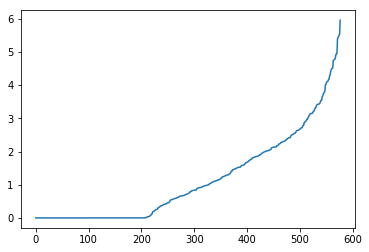

In [10]:
plot_sorted_vector(t)

In [9]:
# x_attention after 300 iterations
res = torch.tensor([-2.8184, -4.7996, -3.9876, -3.8566, -4.4115, -3.4584, -3.6320, -4.2050,
        -2.5787, -4.6619, -3.8523, -3.5725, -3.4671, -2.7178, -4.1536, -3.8887,
        -3.8931, -3.1549, -3.6802, -3.0625, -3.2734, -4.7032, -2.8972, -3.5063,
        -5.1010, -3.8552, -2.9512, -3.9779, -2.5523, -3.7957, -3.3778, -4.1568,
        -3.7028, -3.9606, -3.0218, -3.5421, -3.2393, -3.1208, -3.7183, -3.2857,
        -3.0501, -2.7852, -3.8137, -3.9912, -2.9157, -4.6297, -4.3996, -3.4635,
        -3.7410, -2.9361, -2.9620, -3.1821, -2.7995, -5.1582, -3.2100, -4.3372,
        -3.1541, -2.8380, -3.4606, -3.2597, -3.8616, -3.0290, -2.4275, -3.5948,
        -3.2043, -3.0841, -3.7630, -3.2341, -4.3956, -3.5108, -3.6588, -2.7644,
        -4.0912, -3.4974, -3.6481, -3.6089, -3.5644, -3.1645, -4.1679, -2.9145,
        -4.9560, -5.1880, -3.0763, -3.5295, -3.3810, -3.2993, -4.4584, -4.1012,
        -3.8785, -3.9514, -4.2965, -3.0280, -4.9813, -3.1644, -3.7157, -3.2655,
        -5.3294, -4.2827, -3.2674, -3.7456, -4.5520, -3.3815, -3.7310, -2.5915,
        -3.5455, -4.2847, -4.0040, -3.8050, -2.6571, -4.0610, -4.5692, -2.5280,
        -2.6555, -3.9692, -3.3890, -2.4219, -3.3161, -3.2512, -3.3326, -5.4207,
        -2.8438, -3.5895, -3.4908, -5.3590, -3.7851, -2.5956, -4.7386, -3.3242,
        -5.2846, -3.7385, -3.2238, -4.0027, -2.9507, -3.2245, -4.1236, -2.6397,
        -3.5220, -3.3737, -3.6755, -3.1924, -3.8051, -4.7644, -3.2241, -2.7888,
        -4.0930, -3.9382, -3.8593, -3.9183, -3.3216, -3.5097, -3.3534, -3.7520,
        -4.0349, -3.9807, -5.7673, -3.3840, -2.8278, -4.8819, -4.0148, -3.8458,
        -2.9375, -3.4931, -2.7386, -2.7372, -3.4441, -5.2158, -3.1480, -3.3921,
        -3.0774, -3.2735, -3.8847, -3.0859, -3.9169, -4.9288, -3.8050, -2.7170,
        -3.7945, -2.8826, -4.3275, -2.6956, -3.8581, -4.5411, -3.4829, -3.9881,
        -3.8680, -5.0119, -3.3411, -5.2764, -3.4285, -3.9278, -3.3425, -3.5594,
        -4.4187, -4.1260, -4.2796, -3.6290, -2.6529, -2.7349, -3.0277, -3.2690,
        -4.2317, -3.1049, -2.4503, -4.7283, -4.0523, -6.9850, -3.8504, -3.2339,
        -4.2060, -4.8768, -2.4890, -4.9880, -5.6564, -4.6351, -3.1205, -4.1478,
        -4.1146, -3.0239, -3.9716, -3.4918, -5.4409, -2.8216, -2.8346, -3.3728,
        -3.3851, -5.4880, -5.1033, -4.0541, -4.1701, -1.5756, -5.5155, -3.7333,
        -3.4011, -2.9885, -3.2902, -3.4124, -3.2792, -5.5678, -5.2206, -4.1998,
        -4.9369, -3.1814, -3.4633, -3.9757, -3.4554, -4.2759, -3.1663, -3.7787,
        -4.2703, -4.6959, -3.5485, -4.1973, -3.7573, -2.6591, -4.4977, -3.0738,
        -5.2934, -4.1091, -3.0948, -3.1070, -4.7415, -3.8807, -3.5467, -4.6254,
        -2.9388, -2.4847, -2.6123, -2.9113, -2.8680, -4.3454, -3.3710, -3.8751,
        -3.0029, -4.6628, -3.2286, -3.9010, -2.6462, -4.2515, -4.7030, -3.7737,
        -4.1634, -2.9445, -3.3126, -3.4357, -4.9433, -3.2919, -3.4152, -4.1920,
        -2.9611, -2.9165, -3.5409, -2.6245, -2.3818, -3.3360, -4.9532, -3.1914,
        -3.2677, -4.6908, -3.5468, -3.0995, -3.8700, -3.7152, -3.1235, -4.6477,
        -4.1815, -3.3782, -3.5049, -2.8424, -3.9699, -4.6458, -2.7875, -3.7787,
        -3.1556, -4.6325, -4.0198, -4.2110, -2.9574, -4.4969, -2.9708, -4.1272,
        -4.2958, -4.3486, -3.9898, -3.5897, -4.9031, -4.9788, -5.6933, -2.5233,
        -2.5130, -4.1845, -4.2758, -3.2460, -5.0502, -4.2555, -3.8297, -5.6082,
        -4.2506, -3.0945, -2.2318, -2.4680, -3.2875, -3.5279, -4.2250, -2.7072,
        -5.9147, -3.3997, -4.1490, -5.0566, -4.2827, -3.5136, -4.1419, -4.0237,
        -4.5826, -2.8089, -3.8674, -2.5571, -3.9340, -2.3187, -2.7963, -3.8215,
        -3.1540, -5.0732, -4.6192, -4.5660, -2.9952, -5.2096, -5.8518, -3.4807,
        -3.1458, -4.7539, -5.0963, -3.3378, -3.3342, -3.9953, -2.6883, -3.8277,
        -2.8557, -3.2592, -3.1455, -2.4598, -3.1773, -4.2772, -2.4020, -4.6809,
        -4.2376, -3.0356, -3.4108, -5.0283, -3.7363, -4.2705, -3.8050, -3.7744,
        -7.7004, -3.5322, -4.0804, -3.4999, -2.7378, -3.9559, -4.1092, -3.6411,
        -3.9398, -4.9482, -4.1973, -2.8561, -3.2444, -2.7412, -2.9084, -3.9192,
        -3.8097, -4.4480, -4.6560, -3.1919, -3.7801, -3.9409, -3.7532, -3.9347,
        -3.2408, -3.9042, -5.5083, -3.0721, -4.3962, -3.5546, -2.2945, -2.8271,
        -4.6504, -3.0527, -3.9458, -3.6014, -5.6018, -3.3366, -3.2201, -4.2481,
        -3.3170, -3.3986, -4.1989, -3.1187, -3.8512, -4.0144, -5.3007, -3.2292,
        -3.5874, -3.8583, -4.3857, -3.2461, -4.9389, -3.5985, -3.1421, -4.8633,
        -3.0674, -4.1184, -4.8128, -3.2528, -4.4132, -4.1261, -4.8379, -3.7722,
        -4.0596, -2.4823, -3.3005, -3.4349, -4.7903, -2.9378, -3.5696, -3.7452,
        -4.6265, -2.8790, -3.0493, -2.6909, -4.3977, -3.9065, -4.8351, -3.3332,
        -3.2354, -3.2148, -4.2268, -5.4858, -4.4054, -3.7938, -3.2175, -3.1450,
        -4.5261, -4.7933, -2.7261, -3.0315, -4.1769, -4.5171, -3.6013, -4.2662,
        -3.1005, -3.3018, -3.6689, -3.8657, -5.1927, -4.0125, -4.2147, -4.8180,
        -4.2933, -4.6739, -3.4154, -4.0475, -2.6033, -3.9905, -3.3302, -4.4429,
        -4.0883, -4.4908, -4.0527, -4.7483, -5.8784, -5.0498, -5.0911, -3.4366,
        -4.2197, -4.1465, -4.4186, -4.2121, -3.7894, -4.3109, -4.9135, -3.0912,
        -4.6525, -4.2287, -4.2485, -6.3215, -4.0049, -4.0609, -4.7466, -3.0926,
        -3.8114, -3.4233, -4.2254, -3.3551, -3.5625, -3.6289, -4.8439, -6.7132,
        -4.4482, -5.2374, -2.9535, -3.7315, -4.2960, -2.8818, -5.4470, -4.1596,
        -4.0727, -5.0101, -3.5958, -4.0133, -3.1374, -4.2811, -3.7877, -4.9419,
        -3.4076, -3.9601, -4.6683, -3.1732, -4.1608, -4.1418, -4.3990, -3.0439,
        -2.6684, -3.2871, -5.6223, -3.7203, -4.3874, -4.3604, -3.1218, -2.5256,
        -2.8252, -3.0671, -4.3798, -4.4435, -2.5338, -4.5098, -4.3579, -3.2859,
        -3.7976])
print(sigmoid(res)[229])
torch.where(sigmoid(res) > 0.1)

tensor(0.1714)


(tensor([229]),)

In [ ]:
m = .from_pretrained

In [290]:
9.7505e-01

(0.97505,)

In [292]:
-1.0899e+00

-1.0899

In [10]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
#model.training()
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-384')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-384')

In [12]:
model.training

False

A = bce_with_logits_loss(output, sigmoid(target))

target_off_patches = torch.zeros_like(x_attention)

B = bce_with_logits_loss(x_attention, target_off_patches)

In [4]:
from torch.functional import F
import torch

In [6]:
x = torch.tensor([1.5, -0.7, 3])
x_s = F.softmax(x)
x_s_s = F.softmax(x_s)

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  
C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
x_s, x_s_s

(tensor([0.1788, 0.0198, 0.8014]), tensor([0.2691, 0.2295, 0.5014]))

In [ ]:
x = 

In [29]:
len(torch.where(sigmoid(res_iter_200) > 0.18)[0])

1

In [39]:
len(torch.where(sigmoid(a) > 0.5)[0])

281

In [ ]:
_

In [311]:
sea_snake_x_attention_after_200_steps = torch.tensor([-2.3909, -3.9136, -3.3095, -3.3511, -4.0064, -2.8007, -3.5156, -3.9730,
        -1.8555, -4.0575, -3.2705, -2.9246, -3.0311, -2.1467, -3.5243, -3.3261,
        -3.4733, -2.6215, -3.1681, -2.5614, -2.9429, -4.1132, -2.5197, -3.0138,
        -4.5943, -3.2267, -2.8058, -3.7522, -2.1999, -3.0792, -3.1068, -3.4052,
        -3.0209, -3.2396, -2.4968, -2.7259, -2.4735, -2.6632, -4.3306, -2.7244,
        -2.6641, -2.0594, -3.4852, -3.4930, -2.3434, -4.1978, -3.8931, -2.9550,
        -3.1029, -2.2078, -2.3298, -2.5519, -2.1200, -4.6004, -2.6378, -3.7810,
        -2.5165, -2.2781, -2.9824, -2.5645, -3.1885, -2.3791, -1.9989, -3.3215,
        -2.5242, -2.3889, -3.4419, -2.4347, -3.6962, -2.9318, -3.1021, -1.9480,
        -3.5940, -2.8370, -3.1031, -3.1753, -3.1100, -2.5206, -3.8181, -2.4080,
        -4.5447, -4.4832, -2.8748, -2.9401, -2.7601, -2.5964, -3.8850, -3.3635,
        -3.3398, -3.3006, -3.6808, -2.4394, -4.2590, -2.7761, -2.9985, -2.5940,
        -4.6291, -3.8406, -2.5993, -3.2870, -3.9739, -2.7870, -3.2141, -2.1731,
        -2.8309, -3.9420, -3.4306, -4.0152, -1.8265, -3.0606, -4.0401, -2.2601,
        -2.0578, -3.5797, -2.6825, -1.7153, -2.6338, -2.6956, -2.8167, -4.7274,
        -2.3977, -3.2198, -2.8802, -4.7987, -3.2465, -2.1731, -4.4713, -2.6911,
        -4.5857, -3.3015, -2.2968, -3.5789, -2.3438, -2.2353, -3.5663, -2.4331,
        -3.4611, -3.0982, -3.2131, -2.4338, -3.0741, -4.3406, -2.7087, -2.0371,
        -3.4011, -3.2144, -3.3333, -3.5229, -2.7801, -2.9567, -2.8825, -3.1777,
        -3.3303, -3.3360, -5.4905, -3.2684, -2.3097, -3.9076, -3.3928, -3.6331,
        -2.4198, -2.7137, -2.1634, -2.0378, -2.7602, -4.8879, -2.4377, -2.6336,
        -2.5012, -2.8517, -3.4483, -2.4257, -3.5744, -4.6778, -3.2836, -2.1212,
        -3.1667, -2.3062, -3.8400, -2.2546, -2.8799, -3.3886, -2.1824, -3.7453,
        -2.8950, -4.3241, -2.7283, -4.4659, -2.8397, -3.6179, -2.8180, -3.1530,
        -3.9405, -3.5398, -3.7162, -3.1351, -2.1287, -2.1335, -2.4026, -2.7116,
        -3.5644, -2.9236, -1.6584, -3.7882, -2.6347, -4.9998, -2.6033, -2.6508,
        -3.1085, -3.7882, -1.6937, -4.3766, -5.1328, -4.1984, -2.7557, -3.3951,
        -3.8942, -2.3703, -3.7328, -2.9213, -4.9509, -2.2347, -2.1051, -2.8416,
        -2.7574, -4.9192, -4.5734, -2.8627, -2.4999, -1.6182, -4.7430, -3.6123,
        -3.1791, -2.5162, -2.6600, -2.9627, -2.8729, -4.9602, -4.9416, -3.3916,
        -4.2180, -2.4689, -2.8965, -3.6470, -2.8496, -3.6325, -2.5307, -3.0789,
        -3.6392, -4.1422, -2.5315, -3.5085, -3.2780, -2.6643, -3.3445, -2.9142,
        -4.7602, -3.5506, -2.2901, -2.6148, -4.0372, -3.4104, -2.8700, -4.0697,
        -2.2589, -1.8598, -1.8758, -2.3426, -2.2291, -3.9673, -3.4078, -3.1412,
        -2.4764, -4.1946, -2.6435, -3.2942, -1.9286, -3.3566, -4.9095, -3.7678,
        -3.3959, -1.9782, -2.4636, -2.8616, -4.2068, -3.2688, -2.9464, -3.6221,
        -2.2028, -2.3040, -2.9808, -2.0302, -2.0915, -3.1963, -4.1105, -2.5094,
        -2.7189, -4.0283, -2.8011, -3.2105, -3.0105, -2.3761, -2.2106, -3.6572,
        -3.3373, -2.5368, -2.6908, -2.4130, -3.3675, -3.9032, -2.1015, -3.7243,
        -2.7895, -3.7138, -3.3663, -3.5364, -2.7673, -4.0011, -3.0448, -3.5681,
        -3.4002, -3.5769, -3.2008, -3.3081, -4.2717, -3.4236, -3.9977, -2.0976,
        -1.4291, -3.5766, -3.4756, -3.0149, -4.4451, -3.6258, -3.1884, -4.8243,
        -3.3551, -2.5478, -2.4947, -2.6120, -3.1435, -3.0924, -4.1455, -1.9834,
        -5.0459, -2.9070, -3.3574, -4.3120, -3.3850, -3.7271, -3.6302, -3.2994,
        -3.7371, -2.2811, -3.0130, -2.1744, -3.6312, -1.6077, -2.0198, -3.2172,
        -2.4883, -4.3984, -4.2176, -3.9443, -2.6619, -4.5102, -5.0808, -2.9609,
        -2.6364, -4.1290, -4.2986, -2.7218, -2.5107, -3.5995, -2.0770, -3.0435,
        -1.9845, -2.4419, -2.4700, -1.7555, -2.7521, -3.5256, -1.6701, -3.8926,
        -3.6172, -2.4289, -3.1869, -4.3861, -3.6754, -3.3866, -3.6779, -3.0944,
        -6.1007, -2.6408, -3.4177, -2.5969, -1.8371, -2.9560, -3.1751, -2.6440,
        -3.0259, -4.2587, -3.5362, -2.0852, -2.6317, -2.2862, -2.0665, -3.2384,
        -3.1705, -4.5740, -3.9295, -2.6034, -3.1959, -3.0710, -3.1985, -3.7813,
        -3.0470, -3.1938, -4.5581, -2.1727, -3.5549, -2.9507, -1.6070, -2.2893,
        -3.8659, -2.0477, -3.1513, -2.6590, -4.7956, -2.7049, -2.3849, -3.5310,
        -2.7589, -3.2821, -3.4887, -2.2153, -3.2074, -3.1666, -5.0071, -2.9042,
        -3.2527, -3.5046, -3.6711, -2.2652, -4.3937, -2.7386, -2.7024, -4.4839,
        -2.6246, -3.3508, -4.0780, -2.2803, -3.8336, -3.7402, -4.1953, -3.1394,
        -3.6599, -1.9699, -2.5044, -2.8096, -4.2988, -2.1241, -2.9986, -3.1648,
        -4.0873, -2.1051, -2.4049, -2.0036, -3.5940, -3.1225, -4.0480, -2.5000,
        -2.3393, -2.8085, -3.6533, -4.5677, -3.7358, -3.2210, -2.6367, -2.7691,
        -4.1133, -4.2635, -2.0333, -2.4935, -3.4972, -3.6806, -2.8520, -3.4539,
        -2.4358, -3.0052, -2.8680, -2.9379, -4.3231, -3.1058, -3.4232, -4.2795,
        -3.5552, -4.1841, -2.6787, -3.4049, -1.6813, -3.4190, -2.9028, -3.7583,
        -3.3732, -4.0570, -3.2938, -4.3287, -5.3949, -4.1584, -4.2145, -3.0387,
        -3.5687, -3.3309, -3.6398, -3.4588, -2.8904, -3.7102, -4.1255, -2.3003,
        -3.7441, -3.7992, -3.4610, -5.3307, -3.5113, -3.5429, -4.1977, -2.5522,
        -3.6654, -2.8402, -3.4655, -2.5078, -2.9821, -2.9213, -3.8894, -5.7668,
        -3.8003, -4.4739, -2.4471, -2.9661, -3.3305, -2.3390, -4.6617, -3.6333,
        -3.9163, -4.2642, -3.5927, -3.3902, -2.3925, -3.5692, -3.0098, -4.3929,
        -2.9131, -3.3879, -3.9610, -2.7304, -3.5847, -3.0927, -3.4425, -2.2559,
        -2.1999, -2.6265, -4.7361, -2.7657, -3.3726, -4.1052, -2.9870, -1.9600,
        -1.9137, -2.5683, -3.9645, -3.6198, -1.6335, -4.1072, -3.5432, -2.8479,
        -3.1957])

In [317]:
len(torch.where(sigmoid(sea_snake_x_attention_after_200_steps) >= float(0.15))[0])

10

In [327]:
max(vector_opt)

tensor(0.0011)

In [365]:
x_attention_sigmoids_only_loss_b_500_steps = torch.tensor([5.7691e-04, 1.6538e-04, 2.8230e-04, 2.7245e-04, 1.5189e-04, 4.2737e-04,
        2.3624e-04, 1.5661e-04, 8.0406e-04, 1.4489e-04, 2.9182e-04, 3.8780e-04,
        3.5597e-04, 6.7750e-04, 2.3444e-04, 2.7834e-04, 2.4514e-04, 4.8936e-04,
        3.1805e-04, 5.1137e-04, 3.8218e-04, 1.3760e-04, 5.2699e-04, 3.6100e-04,
        8.7453e-05, 3.0281e-04, 4.2567e-04, 1.9145e-04, 6.5499e-04, 3.4227e-04,
        3.3460e-04, 2.6007e-04, 3.5894e-04, 2.9955e-04, 5.3566e-04, 4.5256e-04,
        5.4459e-04, 4.7442e-04, 1.1229e-04, 4.5306e-04, 4.7412e-04, 7.1492e-04,
        2.4261e-04, 2.4096e-04, 5.9590e-04, 1.2718e-04, 1.6850e-04, 3.7851e-04,
        3.3567e-04, 6.5169e-04, 6.0138e-04, 5.1492e-04, 6.8889e-04, 8.6941e-05,
        4.8348e-04, 1.8655e-04, 5.2819e-04, 6.2250e-04, 3.7026e-04, 5.1023e-04,
        3.1267e-04, 5.8157e-04, 7.4119e-04, 2.7945e-04, 5.2528e-04, 5.7770e-04,
        2.5193e-04, 5.5966e-04, 2.0131e-04, 3.8557e-04, 3.3591e-04, 7.6341e-04,
        2.2049e-04, 4.1549e-04, 3.3563e-04, 3.1612e-04, 3.3373e-04, 5.2663e-04,
        1.8038e-04, 5.7014e-04, 9.1684e-05, 9.7204e-05, 4.0334e-04, 3.8303e-04,
        4.4090e-04, 4.9847e-04, 1.6975e-04, 2.6958e-04, 2.7511e-04, 2.8445e-04,
        2.0410e-04, 5.5781e-04, 1.2010e-04, 4.3555e-04, 3.6550e-04, 4.9935e-04,
        8.4594e-05, 1.7675e-04, 4.9741e-04, 2.8776e-04, 1.5649e-04, 4.3191e-04,
        3.0604e-04, 6.6631e-04, 4.1744e-04, 1.6113e-04, 2.5442e-04, 1.5066e-04,
        8.1683e-04, 3.4753e-04, 1.4724e-04, 6.2993e-04, 7.1562e-04, 2.2330e-04,
        4.6763e-04, 8.6584e-04, 4.8494e-04, 4.6305e-04, 4.2210e-04, 7.6993e-05,
        5.7420e-04, 3.0456e-04, 4.0165e-04, 7.1893e-05, 2.9780e-04, 6.6631e-04,
        9.8315e-05, 4.6463e-04, 8.8170e-05, 2.8424e-04, 6.1482e-04, 2.2344e-04,
        5.9575e-04, 6.4020e-04, 2.2594e-04, 5.6028e-04, 2.4777e-04, 3.3697e-04,
        3.0629e-04, 5.5998e-04, 3.4370e-04, 1.1124e-04, 4.5850e-04, 7.2460e-04,
        2.6098e-04, 3.0595e-04, 2.7664e-04, 2.3473e-04, 4.3418e-04, 3.7797e-04,
        4.0091e-04, 3.1549e-04, 2.7734e-04, 2.7599e-04, 3.6694e-05, 2.9233e-04,
        6.0954e-04, 1.6629e-04, 2.6285e-04, 2.1297e-04, 5.6546e-04, 4.5676e-04,
        6.7042e-04, 7.2427e-04, 4.4086e-04, 6.5969e-05, 5.5848e-04, 4.8498e-04,
        5.3401e-04, 4.1072e-04, 2.5054e-04, 5.6318e-04, 2.2434e-04, 8.0740e-05,
        2.8860e-04, 6.8838e-04, 3.1841e-04, 6.1098e-04, 1.7684e-04, 6.3219e-04,
        4.0173e-04, 2.6381e-04, 6.6237e-04, 1.9263e-04, 3.9697e-04, 1.1298e-04,
        4.5175e-04, 9.8812e-05, 4.1459e-04, 2.1586e-04, 4.2167e-04, 3.2205e-04,
        1.6136e-04, 2.3128e-04, 1.9774e-04, 3.2686e-04, 6.8515e-04, 6.8311e-04,
        5.7226e-04, 4.5748e-04, 2.2632e-04, 3.8810e-04, 8.9077e-04, 1.8533e-04,
        4.8461e-04, 5.9204e-05, 4.9596e-04, 4.7885e-04, 3.3414e-04, 1.8534e-04,
        8.7532e-04, 1.0752e-04, 5.2035e-05, 1.2711e-04, 4.4239e-04, 2.6233e-04,
        1.6833e-04, 5.8509e-04, 1.9481e-04, 3.8879e-04, 6.2076e-05, 6.4044e-04,
        6.9524e-04, 4.1400e-04, 4.4182e-04, 6.4004e-05, 8.9210e-05, 4.0722e-04,
        5.3449e-04, 9.0832e-04, 7.5851e-05, 2.1694e-04, 3.1514e-04, 5.2831e-04,
        4.7558e-04, 3.7617e-04, 4.0398e-04, 6.1520e-05, 6.2633e-05, 2.6314e-04,
        1.2481e-04, 5.4636e-04, 3.9653e-04, 2.1035e-04, 4.1139e-04, 2.1309e-04,
        5.2283e-04, 3.4235e-04, 2.1182e-04, 1.3395e-04, 5.2252e-04, 2.3772e-04,
        2.8999e-04, 4.7406e-04, 2.7401e-04, 3.9099e-04, 7.4606e-05, 2.2908e-04,
        6.1756e-04, 4.9179e-04, 1.4763e-04, 2.5890e-04, 4.0489e-04, 1.4326e-04,
        6.3044e-04, 8.0216e-04, 7.9512e-04, 5.9623e-04, 6.4280e-04, 1.5744e-04,
        2.5948e-04, 3.2521e-04, 5.4349e-04, 1.2756e-04, 4.8146e-04, 2.8602e-04,
        7.7191e-04, 2.7118e-04, 6.4609e-05, 1.8877e-04, 2.6215e-04, 7.5021e-04,
        5.4843e-04, 4.0755e-04, 1.2612e-04, 2.9223e-04, 3.8112e-04, 2.1506e-04,
        6.5381e-04, 6.1190e-04, 3.7076e-04, 7.2758e-04, 7.0108e-04, 3.1063e-04,
        1.3795e-04, 5.3088e-04, 4.5496e-04, 1.4885e-04, 4.2723e-04, 3.0696e-04,
        3.6197e-04, 5.8279e-04, 6.5050e-04, 2.0845e-04, 2.7569e-04, 5.2053e-04,
        4.6473e-04, 5.6817e-04, 2.6866e-04, 1.6696e-04, 6.9681e-04, 1.9632e-04,
        4.3105e-04, 1.9817e-04, 2.6892e-04, 2.3198e-04, 4.3849e-04, 1.5262e-04,
        3.5204e-04, 2.2559e-04, 2.6119e-04, 2.2385e-04, 3.0948e-04, 2.8264e-04,
        1.1868e-04, 2.5596e-04, 1.5311e-04, 6.9846e-04, 9.8942e-04, 2.2390e-04,
        2.4464e-04, 3.6067e-04, 1.0079e-04, 2.1435e-04, 3.1269e-04, 7.0145e-05,
        2.7152e-04, 5.1644e-04, 5.3648e-04, 4.9279e-04, 3.2461e-04, 3.3860e-04,
        1.3354e-04, 7.4792e-04, 5.6620e-05, 3.9325e-04, 2.7099e-04, 1.1428e-04,
        2.6463e-04, 1.9582e-04, 2.1351e-04, 2.8475e-04, 1.9407e-04, 6.2126e-04,
        3.6124e-04, 6.6575e-04, 2.1333e-04, 9.1289e-04, 7.3208e-04, 3.0523e-04,
        5.3891e-04, 1.0533e-04, 1.2485e-04, 1.6080e-04, 4.7490e-04, 9.4742e-05,
        5.4732e-05, 3.7673e-04, 4.8400e-04, 1.3559e-04, 1.1573e-04, 4.5395e-04,
        5.3039e-04, 2.1940e-04, 7.0735e-04, 3.5242e-04, 7.4744e-04, 5.5682e-04,
        5.4595e-04, 8.4815e-04, 4.4361e-04, 2.3418e-04, 8.8565e-04, 1.6857e-04,
        2.1600e-04, 5.6193e-04, 3.1309e-04, 1.0657e-04, 2.0509e-04, 2.6427e-04,
        2.0463e-04, 3.3802e-04, 2.0121e-05, 4.8242e-04, 2.5726e-04, 4.9829e-04,
        8.1219e-04, 3.7821e-04, 3.1619e-04, 4.8128e-04, 3.5748e-04, 1.2013e-04,
        2.3202e-04, 7.0380e-04, 4.8569e-04, 6.1918e-04, 7.1184e-04, 2.9984e-04,
        3.1739e-04, 8.9164e-05, 1.6299e-04, 4.9591e-04, 3.1074e-04, 3.4458e-04,
        3.1007e-04, 1.8650e-04, 3.5139e-04, 3.1127e-04, 9.0528e-05, 6.6647e-04,
        2.2822e-04, 3.7979e-04, 9.1318e-04, 6.1789e-04, 1.7272e-04, 7.2000e-04,
        3.2252e-04, 4.7592e-04, 7.2111e-05, 4.5981e-04, 5.7926e-04, 2.3307e-04,
        4.4130e-04, 2.8897e-04, 2.4187e-04, 6.4854e-04, 3.0776e-04, 3.1842e-04,
        5.8789e-05, 3.9410e-04, 2.9626e-04, 2.3853e-04, 2.0588e-04, 6.2781e-04,
        1.0581e-04, 4.4820e-04, 4.6066e-04, 9.7141e-05, 4.8824e-04, 2.7253e-04,
        1.4216e-04, 6.2159e-04, 1.7787e-04, 1.9353e-04, 1.2748e-04, 3.2571e-04,
        2.0795e-04, 7.5385e-04, 5.3277e-04, 4.2442e-04, 1.1570e-04, 6.8714e-04,
        3.6546e-04, 3.1892e-04, 1.4094e-04, 6.9524e-04, 5.7133e-04, 7.3914e-04,
        2.2047e-04, 3.3029e-04, 1.4616e-04, 5.3444e-04, 5.9756e-04, 4.2477e-04,
        2.0918e-04, 8.9699e-05, 1.9430e-04, 3.0426e-04, 4.8387e-04, 4.3787e-04,
        1.3759e-04, 1.1960e-04, 7.2621e-04, 5.3694e-04, 2.4008e-04, 2.0414e-04,
        4.1062e-04, 2.4931e-04, 5.5922e-04, 3.6352e-04, 4.0554e-04, 3.8371e-04,
        1.1309e-04, 3.3488e-04, 2.5605e-04, 1.1781e-04, 2.2817e-04, 1.2882e-04,
        4.6896e-04, 2.6013e-04, 8.8073e-04, 2.5699e-04, 3.9453e-04, 1.9040e-04,
        2.6733e-04, 1.4496e-04, 2.8611e-04, 1.1249e-04, 4.0293e-05, 1.3194e-04,
        1.2521e-04, 3.5377e-04, 2.2547e-04, 2.7720e-04, 2.1171e-04, 2.4827e-04,
        3.9845e-04, 1.9881e-04, 1.3603e-04, 6.1339e-04, 1.9285e-04, 1.8351e-04,
        2.4777e-04, 4.2905e-05, 2.3713e-04, 2.3064e-04, 1.2719e-04, 5.1478e-04,
        2.0692e-04, 4.1445e-04, 2.4681e-04, 5.3149e-04, 3.7035e-04, 3.8880e-04,
        1.6908e-04, 2.7969e-05, 1.8332e-04, 9.8070e-05, 5.5483e-04, 3.7514e-04,
        2.7729e-04, 5.9768e-04, 8.2000e-05, 2.1293e-04, 1.6497e-04, 1.1952e-04,
        2.2074e-04, 2.6345e-04, 5.7625e-04, 2.2537e-04, 3.6217e-04, 1.0589e-04,
        3.9134e-04, 2.6397e-04, 1.5835e-04, 4.5102e-04, 2.2230e-04, 3.3851e-04,
        2.5179e-04, 6.3166e-04, 6.5503e-04, 4.8756e-04, 7.6354e-05, 4.3901e-04,
        2.6747e-04, 1.3863e-04, 3.6891e-04, 7.5818e-04, 7.7849e-04, 5.0882e-04,
        1.5784e-04, 2.1550e-04, 9.0165e-04, 1.3838e-04, 2.3059e-04, 4.1196e-04,
        3.1078e-04])

sum of sigmoids 0.2

In [368]:
sum((x_attention_sigmoids_only_loss_b_500_steps)).item()

0.20773734152317047

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


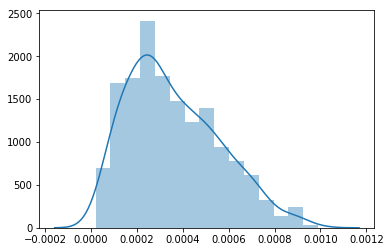

In [369]:
sns.distplot(x_attention_sigmoids_only_loss_b_500_steps)

In [387]:
attention_scores = torch.randn(577)

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


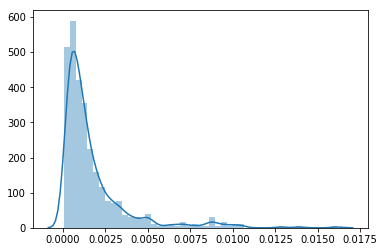

In [389]:
attention_probs = F.softmax(attention_scores)
sns.distplot(attention_probs)

In [390]:
mul = x_attention_sigmoids_only_loss_b_500_steps * a
mul = mul / sum(mul)

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


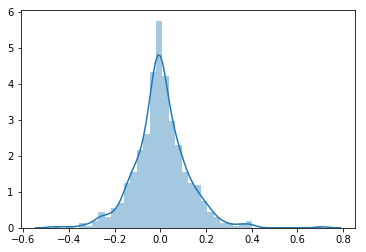

In [391]:
sns.distplot(mul)

In [424]:
both_losses_without_norm_step_130_pred_correct_class_prob_0_983 = torch.tensor([7.3700e-02, 6.2074e-04, 2.8882e-03, 2.6508e-03, 1.2256e-03, 2.8753e-03,
        1.9645e-01, 1.3565e-01, 1.5358e-02, 2.2553e-02, 1.3111e-01, 8.8943e-02,
        9.3946e-02, 6.6460e-02, 1.6188e-01, 2.0375e-01, 2.6923e-01, 6.9874e-02,
        7.9372e-02, 1.1976e-01, 1.5552e-02, 9.6747e-04, 4.7370e-03, 2.4650e-03,
        8.0131e-04, 5.0877e-03, 1.6813e-01, 1.8956e-03, 6.9198e-03, 4.0153e-03,
        4.6405e-01, 1.4871e-03, 2.2338e-03, 2.1131e-03, 8.6504e-03, 3.9072e-03,
        5.2454e-03, 1.3305e-01, 2.3517e-01, 2.0522e-01, 1.7925e-01, 7.9011e-03,
        2.4081e-03, 6.5357e-02, 4.7829e-03, 1.1216e-03, 1.1932e-01, 3.4300e-03,
        2.1003e-02, 5.7666e-03, 2.0621e-01, 4.5489e-03, 7.6608e-03, 7.1087e-04,
        8.2971e-02, 2.4888e-01, 4.2947e-02, 2.2784e-02, 7.3881e-02, 1.9576e-01,
        2.0100e-01, 2.5570e-01, 3.1966e-01, 2.0531e-01, 1.1445e-01, 2.9923e-02,
        1.8590e-01, 1.6026e-01, 1.2859e-01, 8.3147e-03, 2.6851e-03, 1.3842e-02,
        3.4494e-03, 9.3238e-03, 5.5914e-03, 8.9616e-03, 3.3274e-03, 3.6352e-03,
        2.5516e-03, 1.3493e-02, 1.8368e-01, 1.8331e-01, 9.0886e-02, 3.2851e-03,
        2.4657e-01, 2.9824e-01, 1.3639e-01, 1.3169e-01, 4.7667e-02, 1.4553e-02,
        6.1734e-02, 1.3256e-01, 1.6875e-01, 8.9507e-02, 5.2128e-02, 1.6718e-02,
        2.4162e-02, 2.2070e-03, 5.2511e-03, 2.2042e-03, 3.7947e-03, 1.6557e-01,
        1.0129e-01, 1.0450e-01, 2.0652e-01, 1.4829e-01, 2.0399e-01, 1.2359e-01,
        3.3700e-02, 4.4172e-02, 1.7333e-01, 1.4378e-02, 3.7199e-02, 5.8998e-01,
        1.4818e-02, 3.5181e-02, 1.3961e-01, 1.5498e-01, 3.8249e-03, 7.6446e-04,
        9.0202e-03, 4.2470e-03, 7.2241e-03, 7.6565e-03, 2.1482e-01, 2.0048e-01,
        1.0634e-01, 2.6231e-01, 1.2334e-01, 2.1164e-01, 9.1512e-02, 2.6034e-01,
        1.1811e-01, 6.3289e-03, 4.5709e-02, 1.3322e-01, 3.2163e-01, 1.3953e-01,
        1.6438e-01, 3.4651e-02, 5.6009e-03, 6.4251e-03, 1.0387e-01, 1.2392e-02,
        4.4576e-01, 3.7855e-03, 4.0999e-02, 2.3475e-03, 3.1209e-03, 6.0157e-02,
        1.2482e-01, 2.0406e-01, 2.8935e-01, 4.7044e-01, 3.4223e-03, 5.3691e-01,
        9.1956e-02, 6.2919e-01, 7.4319e-02, 7.5893e-04, 2.3597e-01, 3.6024e-03,
        4.8491e-01, 3.9009e-01, 1.4245e-01, 1.8612e-03, 5.0709e-03, 1.7946e-01,
        4.7230e-03, 2.7065e-03, 3.2720e-03, 1.9046e-01, 6.3531e-01, 1.4620e-03,
        2.4249e-03, 2.2421e-02, 5.3339e-03, 6.0019e-02, 7.6004e-01, 7.6161e-01,
        8.1235e-01, 7.9022e-01, 1.6508e-01, 4.2513e-01, 9.0886e-01, 2.1713e-02,
        4.9490e-01, 3.3758e-01, 8.9140e-01, 9.3541e-01, 5.7000e-03, 5.0262e-03,
        2.3726e-01, 5.8086e-03, 3.9175e-03, 4.1946e-03, 1.0702e-02, 5.6208e-03,
        8.3978e-03, 2.1041e-02, 4.9570e-01, 8.5798e-01, 8.4200e-01, 7.5706e-01,
        6.7448e-01, 1.1603e-03, 3.4622e-03, 1.4690e-02, 6.3826e-01, 4.8568e-01,
        7.8843e-03, 4.3355e-02, 5.9062e-01, 1.4730e-01, 2.9904e-01, 1.7150e-03,
        1.6847e-03, 4.1979e-03, 1.0101e-02, 1.0353e-02, 9.7639e-02, 5.4662e-02,
        4.7439e-03, 8.3876e-01, 3.1414e-01, 8.6724e-01, 8.2547e-01, 3.0615e-01,
        2.4836e-03, 8.1375e-01, 5.7128e-01, 2.7652e-02, 3.2326e-03, 7.7441e-01,
        2.5574e-03, 1.8298e-03, 7.5622e-03, 6.6010e-04, 5.7920e-04, 3.4288e-01,
        1.6397e-03, 4.9881e-03, 2.4719e-02, 5.9770e-02, 1.2555e-01, 1.2262e-03,
        1.3585e-03, 9.7918e-03, 6.6990e-01, 7.9999e-01, 7.0298e-01, 5.4978e-01,
        1.6742e-02, 6.6364e-01, 2.5056e-01, 2.5316e-01, 3.6922e-03, 3.4363e-03,
        8.9077e-03, 5.3650e-03, 7.1478e-04, 2.2981e-03, 7.0884e-02, 1.3802e-01,
        2.1629e-01, 5.2892e-03, 1.4259e-02, 7.7727e-02, 1.4967e-02, 2.9129e-04,
        9.1063e-01, 2.2086e-03, 3.8695e-03, 1.9821e-03, 1.4938e-02, 7.1042e-03,
        1.7400e-01, 3.7676e-03, 2.4444e-01, 4.3100e-01, 3.1159e-03, 7.5165e-03,
        5.4180e-02, 4.0162e-03, 2.9932e-01, 6.8260e-02, 1.7159e-03, 4.0320e-02,
        4.0257e-03, 3.9370e-03, 3.6634e-03, 3.1989e-03, 5.1982e-02, 3.4304e-03,
        3.3208e-04, 5.8683e-01, 4.6793e-01, 3.2169e-03, 8.9706e-03, 1.8683e-01,
        1.3302e-02, 9.6318e-03, 1.2627e-02, 3.4244e-02, 2.4965e-03, 1.0433e-01,
        1.9564e-01, 3.8461e-01, 2.7409e-03, 9.6914e-02, 4.6338e-03, 1.1250e-01,
        3.2245e-03, 5.0472e-01, 3.6627e-03, 4.0778e-01, 7.2511e-03, 1.2642e-03,
        1.1323e-02, 3.8977e-03, 2.1503e-03, 1.8290e-03, 5.0874e-03, 3.5724e-03,
        2.9155e-03, 4.7504e-01, 1.8102e-01, 1.7223e-02, 1.4686e-02, 4.7569e-03,
        2.1467e-03, 5.2923e-03, 1.0117e-02, 4.3159e-03, 1.9238e-01, 1.2339e-03,
        1.1204e-02, 1.2460e-02, 3.1042e-01, 6.9891e-03, 4.3866e-03, 6.6991e-03,
        8.4033e-04, 9.6433e-03, 7.3251e-04, 2.7594e-03, 2.0644e-03, 1.1323e-03,
        2.3674e-02, 2.4609e-03, 2.2411e-03, 5.7503e-03, 1.0819e-01, 4.9439e-02,
        7.7462e-03, 1.2587e-02, 4.1215e-03, 2.8967e-02, 1.0520e-02, 1.8652e-03,
        8.4885e-03, 4.3246e-01, 6.1998e-03, 7.1280e-03, 4.3943e-03, 1.2659e-03,
        1.9451e-01, 6.2395e-03, 4.1880e-03, 1.6688e-03, 2.4204e-03, 3.1175e-03,
        3.2632e-02, 1.6875e-03, 6.5908e-03, 2.3802e-03, 4.2266e-03, 4.2882e-03,
        4.5570e-02, 1.3349e-02, 3.8584e-01, 2.2620e-01, 5.7211e-02, 2.6960e-03,
        2.5195e-03, 4.9021e-03, 2.1592e-03, 1.5983e-03, 1.2478e-03, 2.7710e-03,
        1.1484e-01, 2.1411e-03, 2.1516e-04, 1.1538e-01, 6.0250e-02, 9.2747e-02,
        4.6321e-03, 3.8785e-03, 3.7939e-03, 4.1368e-01, 2.7107e-03, 1.3261e-03,
        1.8483e-02, 4.9662e-03, 4.7932e-03, 7.8053e-03, 4.5185e-03, 4.0198e-01,
        2.6372e-02, 1.2293e-03, 1.5690e-03, 3.2928e-03, 2.1389e-01, 1.0620e-01,
        1.6166e-03, 8.0636e-02, 1.2714e-01, 2.7302e-01, 1.8346e-02, 6.3606e-02,
        1.3823e-01, 2.0216e-03, 5.8092e-02, 8.1977e-03, 2.1097e-03, 1.9109e-01,
        2.0761e-03, 3.9240e-03, 5.3706e-04, 5.0221e-02, 5.2242e-03, 3.0056e-03,
        3.5115e-03, 2.1759e-03, 3.3162e-03, 1.1270e-01, 1.6453e-01, 3.1242e-03,
        2.1196e-03, 3.5227e-03, 2.5719e-01, 1.6963e-03, 3.8434e-03, 2.4202e-01,
        5.8717e-02, 1.1284e-02, 2.7954e-03, 1.5683e-03, 6.4879e-03, 1.8456e-01,
        3.8830e-01, 8.1780e-02, 4.0102e-03, 1.6188e-03, 9.5955e-04, 3.1612e-01,
        4.5858e-03, 4.7986e-03, 3.0075e-03, 5.1005e-03, 1.1034e-02, 1.4254e-02,
        3.0896e-03, 2.0234e-03, 1.4882e-03, 8.8811e-03, 4.6860e-03, 1.0432e-02,
        3.0861e-03, 2.3064e-03, 7.9720e-04, 2.7166e-03, 3.6262e-03, 4.3940e-03,
        7.7686e-02, 6.6567e-04, 2.6499e-03, 1.6678e-03, 5.0947e-03, 5.3142e-03,
        1.9454e-03, 7.9074e-04, 6.5963e-03, 6.3698e-03, 2.7720e-03, 2.5638e-03,
        3.1897e-03, 1.4906e-01, 7.5729e-03, 2.9164e-02, 3.4972e-03, 3.8564e-03,
        1.7133e-03, 1.4504e-01, 2.5531e-03, 7.2309e-02, 4.2608e-02, 4.3622e-02,
        3.1209e-03, 1.3701e-03, 1.0322e-02, 4.0427e-02, 3.2017e-03, 1.1382e-03,
        1.1996e-03, 3.0562e-03, 7.2367e-03, 2.0009e-03, 4.2984e-04, 8.8730e-04,
        1.4383e-03, 8.6278e-03, 7.5601e-02, 2.8484e-03, 1.7375e-03, 4.4146e-02,
        1.9687e-01, 2.3022e-01, 2.4292e-01, 3.7177e-03, 1.1881e-03, 5.4619e-03,
        2.6493e-03, 5.2970e-02, 3.7647e-03, 1.8445e-03, 1.5338e-01, 1.5622e-02,
        2.0414e-03, 2.9453e-03, 3.2970e-03, 4.5329e-03, 7.8739e-03, 2.4810e-02,
        2.1533e-03, 2.0919e-04, 4.2053e-03, 2.5718e-03, 7.7650e-03, 1.1667e-01,
        2.3322e-01, 1.0078e-01, 1.3281e-01, 1.2511e-03, 4.3714e-02, 2.3773e-02,
        3.1878e-02, 2.8939e-03, 8.4668e-03, 4.1815e-03, 1.0292e-02, 3.5748e-01,
        3.9642e-01, 2.3706e-03, 3.1872e-03, 7.7277e-03, 2.4263e-03, 2.6982e-03,
        2.1918e-03, 5.5694e-03, 4.0898e-03, 3.3652e-02, 8.6566e-03, 3.9178e-02,
        2.2091e-02, 1.3530e-03, 3.6005e-03, 9.4144e-03, 5.3091e-03, 2.9408e-03,
        9.7302e-04, 4.3610e-03, 8.9978e-03, 3.4069e-01, 6.0022e-03, 4.2802e-01,
        6.3224e-03])

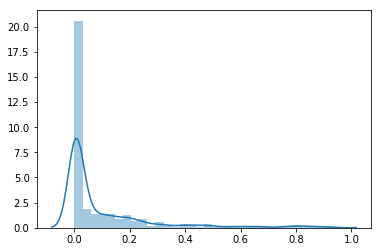

In [426]:
_ = sns.distplot(both_losses_without_norm_step_130_pred_correct_class_prob_0_983)

In [432]:
print(f'sigmoids bigger than 0.5: {len(torch.where(both_losses_without_norm_step_130_pred_correct_class_prob_0_983 > 0.5)[0])}, sigmoids bigger than 0.8: {len(torch.where(both_losses_without_norm_step_130_pred_correct_class_prob_0_983 > 0.8)[0])}')
print('losses: a(preds): 5.926652908325195, b(darkness): 0.15159834921360016')

sigmoids bigger than 0.5: 31, sigmoids bigger than 0.8: 11
losses: a(preds): 5.926652908325195, b(darkness): 0.15159834921360016


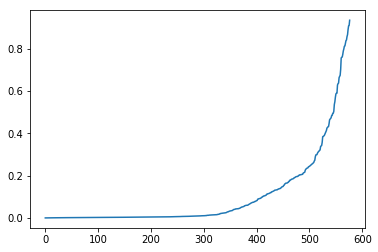

In [446]:
plot_sorted_vector(both_losses_without_norm_step_130_pred_correct_class_prob_0_983)

In [588]:
a = tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0383, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.3591, 0.0000, 0.0000, 0.1794, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.1419, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

In [592]:
a[torch.where(a)[0]]

tensor([0.0383, 0.3591, 0.1794, 0.1419])

In [591]:
torch.where(a)[0]

tensor([246, 282, 285, 299])

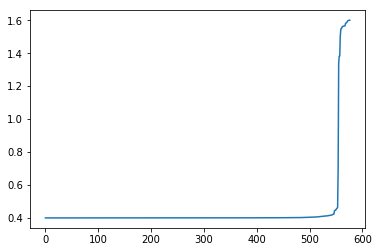

In [586]:
plot_sorted_vector(test)

In [584]:
test = tensor([0.4423, 0.4001, 0.3998, 0.3997, 0.3996, 0.3997, 0.3996, 0.3996, 0.3997,
        0.3996, 0.3997, 0.3996, 0.3996, 0.3996, 0.3996, 0.3996, 0.3998, 0.3997,
        0.3996, 0.4002, 0.3997, 0.3997, 0.3996, 0.3996, 0.4002, 0.3997, 0.3997,
        0.4000, 0.3996, 0.4001, 0.4004, 0.3996, 0.3996, 0.3998, 0.4000, 0.4000,
        0.3996, 0.3998, 0.3998, 0.3997, 0.3999, 0.3997, 0.3999, 0.3997, 0.3996,
        0.3996, 0.3998, 0.3996, 0.4003, 0.3997, 0.4004, 0.3997, 0.3996, 0.3997,
        0.3996, 0.3996, 0.3996, 0.3996, 0.3996, 0.3996, 0.3997, 0.3999, 0.4028,
        0.3996, 0.3997, 0.3999, 0.3997, 0.3996, 0.3997, 0.3996, 0.3996, 0.3996,
        0.3997, 0.4000, 0.4048, 0.4007, 0.3996, 0.3997, 0.4000, 0.4000, 0.3996,
        0.3996, 0.3997, 0.3997, 0.4002, 0.4001, 0.3997, 0.3996, 0.4007, 0.3996,
        0.3996, 0.3997, 0.3997, 0.4002, 0.4017, 0.3997, 0.4001, 0.4012, 0.4000,
        0.4005, 0.4005, 0.3998, 0.3996, 0.3996, 0.3997, 0.4001, 0.3996, 0.3996,
        0.3996, 0.3997, 0.3997, 0.4015, 0.3996, 0.3996, 0.3999, 0.3999, 0.3996,
        0.3998, 0.3996, 0.4005, 0.4001, 0.4001, 0.3996, 0.4021, 0.4001, 0.3998,
        0.3997, 0.4002, 0.3997, 0.4008, 0.3996, 0.4012, 0.4022, 0.4055, 0.3996,
        0.4007, 0.3996, 0.4002, 0.3996, 0.3996, 0.3998, 0.3997, 0.3998, 0.4004,
        0.3997, 0.3996, 0.4000, 0.3998, 0.4021, 0.3996, 0.3997, 0.4014, 0.4004,
        0.4033, 0.3998, 0.3999, 0.3996, 0.4000, 0.4009, 0.4071, 0.4019, 0.4009,
        0.4001, 0.4035, 0.3996, 0.4006, 0.3997, 0.3997, 0.3996, 0.3997, 0.3997,
        0.4150, 0.4005, 0.4000, 0.3998, 0.3996, 0.4019, 1.5526, 0.4459, 0.4224,
        0.4050, 0.4067, 0.4108, 0.4013, 0.4161, 0.4117, 1.6004, 0.4095, 1.5655,
        1.5655, 0.4012, 0.3997, 0.4002, 0.3997, 0.3999, 0.3997, 0.4004, 0.4035,
        0.3998, 0.3996, 0.4120, 0.4025, 0.4040, 0.7102, 0.4171, 1.5639, 1.3821,
        0.3999, 1.5819, 0.4017, 1.6003, 0.4039, 0.3997, 0.4011, 0.4017, 0.3999,
        0.3996, 0.3997, 0.3999, 0.4007, 0.3996, 0.4004, 0.3997, 0.4006, 0.4585,
        1.5985, 0.4507, 0.4168, 0.4086, 0.4062, 0.4093, 0.4115, 0.3997, 1.5958,
        0.4125, 0.4050, 0.4015, 0.4002, 0.3996, 0.3998, 0.4006, 0.4005, 0.3998,
        0.4010, 0.3999, 0.3998, 0.4005, 1.5026, 1.3393, 1.5833, 1.6002, 1.5432,
        1.5619, 0.4009, 0.4148, 0.4554, 0.4641, 1.5873, 1.5536, 0.4100, 0.3997,
        0.3996, 0.3996, 0.3996, 0.3997, 0.4001, 0.4001, 0.3997, 0.3997, 0.4002,
        1.3830, 1.5660, 1.5631, 0.4001, 0.4151, 0.4015, 0.4002, 0.4000, 0.4006,
        0.4013, 0.4001, 0.4003, 0.4120, 0.3996, 0.3996, 0.3997, 0.3997, 0.3996,
        0.3999, 0.3997, 0.3998, 0.4009, 0.3996, 0.3997, 0.4230, 0.4207, 1.5893,
        0.4061, 0.3998, 0.4003, 0.3996, 0.4000, 0.3997, 0.4029, 0.3998, 0.3997,
        0.3996, 0.4007, 0.4006, 0.3999, 0.4010, 0.3997, 0.4001, 0.3999, 0.3996,
        0.3998, 0.3996, 0.4014, 0.3997, 0.4019, 0.4004, 0.3997, 0.4003, 0.3996,
        0.3999, 0.3997, 0.3996, 0.3997, 0.3997, 0.3996, 0.3998, 0.3998, 0.4002,
        0.3998, 0.3997, 0.4000, 0.4002, 0.4000, 0.3998, 0.4014, 0.3999, 0.3998,
        0.3996, 0.3997, 0.4190, 0.3998, 0.4014, 0.3998, 0.3996, 0.3996, 0.3996,
        0.3996, 0.3996, 0.3996, 0.3998, 0.3996, 0.3996, 0.4001, 0.3996, 0.3997,
        0.3997, 0.4006, 0.3998, 0.4005, 0.4002, 0.3999, 0.3997, 0.3996, 0.4081,
        0.3999, 0.3997, 0.3998, 0.3997, 0.3996, 0.3997, 0.3996, 0.4004, 0.3998,
        0.4003, 0.3996, 0.3998, 0.4006, 0.4000, 0.4003, 0.3997, 0.4000, 0.4008,
        0.4056, 0.4025, 0.4017, 0.3998, 0.4045, 0.4079, 0.4139, 0.4029, 0.3996,
        0.3996, 0.3998, 0.3997, 0.4007, 0.4004, 0.4032, 0.4005, 0.3996, 0.3997,
        0.4000, 0.3999, 0.3998, 0.4002, 0.3996, 0.4056, 0.3997, 0.4004, 0.4006,
        0.4025, 0.4019, 0.3997, 0.3996, 0.3996, 0.4003, 0.3996, 0.3996, 0.4033,
        0.4022, 0.3996, 0.4083, 0.4024, 0.4008, 0.4000, 0.4004, 0.4010, 0.3997,
        0.3997, 0.3997, 0.4001, 0.4082, 0.4015, 0.4027, 0.3997, 0.3998, 0.4103,
        0.4005, 0.4000, 0.3997, 0.3997, 0.4006, 0.3997, 0.3996, 0.3997, 0.4457,
        0.4126, 0.3996, 0.3996, 0.3997, 0.4005, 0.3998, 0.3998, 0.4005, 0.4012,
        0.4025, 0.4017, 0.4007, 0.4022, 0.4015, 0.4002, 0.3998, 0.4007, 0.4015,
        0.3996, 0.3998, 0.3997, 0.3999, 0.3999, 0.4002, 0.3998, 0.3996, 0.4004,
        0.4008, 0.3997, 0.3996, 0.3996, 0.3996, 0.4000, 0.3998, 0.3997, 0.3996,
        0.4006, 0.3997, 0.4008, 0.3996, 0.3999, 0.4000, 0.3999, 0.4000, 0.3998,
        0.4001, 0.3996, 0.3998, 0.3997, 0.3998, 0.3996, 0.3997, 0.4003, 0.3996,
        0.4020, 0.3997, 0.4000, 0.3999, 0.3998, 0.3998, 0.3996, 0.3996, 0.3997,
        0.3996, 0.3997, 0.3998, 0.3996, 0.4004, 0.3996, 0.3996, 0.3997, 0.3998,
        0.3996, 0.3999, 0.3997, 0.3997, 0.3996, 0.3997, 0.3998, 0.3996, 0.3997,
        0.3998, 0.4000, 0.3999, 0.3997, 0.3998, 0.3997, 0.3997, 0.3997, 0.4000,
        0.3996, 0.3999, 0.3996, 0.3996, 0.3996, 0.3997, 0.3997, 0.3998, 0.3997,
        0.3998, 0.3996, 0.4010, 0.3997, 0.4108, 0.3998, 0.4001, 0.3998, 0.4005,
        0.3998, 0.4000, 0.3996, 0.3997, 0.3997, 0.3996, 0.4001, 0.3998, 0.3998,
        0.4001, 0.3996, 0.4001, 0.4007, 0.3997, 0.3996, 0.3998, 0.4008, 0.4010,
        0.4002])

In [449]:
a = torch.tensor([-2, 4, 5])

In [450]:
a

tensor([-2,  4,  5])

In [452]:
a.abs().sum()

tensor(11)

In [ ]:
take vector x 

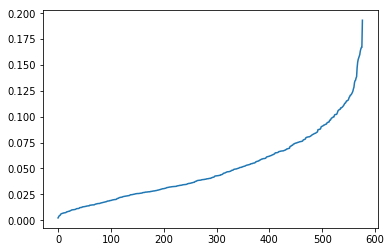

In [319]:
import matplotlib.pyplot as plt
plt.plot(sorted(sigmoid((sea_snake_x_attention_after_200_steps))))
plt.show()

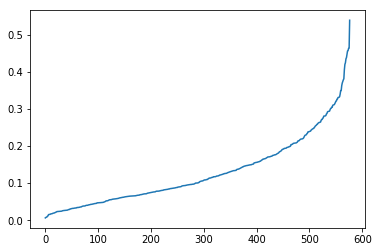

In [303]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.show()

In [504]:
attentions = sigmoid(sea_snake_x_attention_after_100_steps).unsqueeze(0)

In [513]:
attentions.shape

torch.Size([1, 577])

In [516]:
attentions[:, 1:].shape

torch.Size([1, 576])

In [ ]:
lenm

In [509]:
(384*384) / (16*16)

576.0

In [511]:
(384 // 16) ** 2

576

In [543]:
576/2

288.0

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

In [551]:
from torch import tensor

In [556]:
r = tensor([ 2.0072e+00, -7.5417e-01, -5.3397e-01, -6.2553e-02, -2.5206e-01,
        -1.8185e-01, -4.7676e-01, -3.8549e-02, -1.6943e-01, -8.5822e-02,
        -6.4948e-01, -2.8598e-01, -1.6695e-01, -4.8243e-01, -6.0304e-01,
        -5.9549e-01, -3.7759e-01, -5.6377e-01, -1.3515e-01, -3.7472e-01,
        -8.9897e-01, -3.9437e-01, -2.9615e-01, -7.1813e-01, -3.5572e-01,
        -4.9799e-01, -3.7700e-01, -8.3994e-01, -5.9723e-01, -4.5036e-01,
        -9.7451e-01, -1.4009e+00, -6.7984e-01, -1.1629e-01, -2.4050e-01,
        -1.1522e+00, -7.1498e-01, -4.7873e-01, -1.0167e-01, -6.2430e-01,
        -6.9529e-02, -4.7670e-01, -3.4543e-01, -8.5261e-01, -5.0498e-01,
        -9.9774e-02, -4.1185e-01, -5.2217e-01, -2.4901e-01, -8.6576e-01,
        -8.4680e-01, -1.4008e+00, -8.2322e-01, -1.8556e-02, -1.6413e-01,
        -5.4172e-01,  2.0754e-01, -5.2720e-01, -6.9924e-04, -4.1122e-01,
        -8.5931e-01, -4.1364e-01, -2.2726e-01, -3.9301e-01, -4.7690e-01,
        -3.8049e-01, -7.0348e-01, -5.2157e-01, -1.0072e+00, -6.9641e-01,
        -2.0888e-01, -8.2367e-01, -8.7481e-01,  6.1505e-01, -1.2147e+00,
        -5.1399e-01, -9.9463e-02, -1.4236e-01, -8.2055e-01, -7.6082e-04,
         1.2417e+00, -5.1339e-01, -4.6979e-01,  3.7980e-02, -2.9410e-01,
        -5.4593e-01, -2.7122e-01, -3.1412e-01,  4.5507e-02, -1.6817e-01,
        -1.8725e-01, -1.7359e-01, -2.5487e-02, -2.3216e-01, -8.5882e-02,
        -3.1490e-01, -4.6587e-01,  1.5246e-01, -6.4557e-01, -8.1879e-01,
        -4.0243e-01, -4.6043e-01, -3.6941e-01, -9.1114e-01, -6.1067e-01,
        -8.8407e-02, -7.0190e-01, -1.0428e+00, -5.6316e-01, -4.2018e-01,
        -7.4211e-01, -5.4652e-01, -2.0294e-01, -7.6780e-02, -8.2346e-01,
        -5.8788e-01, -3.6032e-01,  7.3493e-02, -2.6789e-01, -1.1025e+00,
        -1.1406e+00, -4.1633e-01, -1.3631e+00, -5.8678e-02, -4.5365e-01,
        -4.1272e-01, -6.8480e-01, -1.3496e-01, -4.0186e-01, -3.1989e-01,
        -1.0538e+00, -1.0971e+00, -6.8270e-01, -2.6656e-01, -1.2023e+00,
        -4.2871e-01,  1.5420e-02,  1.9104e-03,  3.3630e-02, -3.4494e-01,
        -6.1547e-01,  3.3854e-01, -6.9796e-01, -2.7747e-01, -1.3467e+00,
        -1.5631e+00, -1.2582e+00, -6.0664e-01, -2.4210e-02, -1.2214e+00,
         8.3821e-02, -8.3072e-01, -3.2504e-01, -5.5522e-01, -6.3194e-01,
         9.4481e-01, -3.2537e-01, -2.5711e-02, -5.1807e-01, -1.2904e+00,
        -8.2455e-01, -1.6239e+00, -8.4733e-01, -5.9431e-01, -4.5400e-01,
        -7.8444e-02, -8.9640e-01, -9.2697e-01, -1.2512e+00, -8.9240e-01,
        -9.8172e-01, -2.6823e-01, -5.8635e-01, -5.3229e-01, -6.1880e-01,
        -1.0092e+00, -7.8556e-01, -1.7455e+00, -3.9526e-01, -9.7473e-01,
        -1.4224e+00, -1.2120e+00, -1.4676e+00, -8.6362e-01,  3.4650e-01,
        -1.0816e+00,  9.1972e+00, -2.9967e-01,  7.9556e-01,  3.8409e+00,
        -7.9200e-01, -3.3375e-01, -1.1579e-01, -7.1473e-01, -2.9529e-01,
        -1.6119e+00, -8.4164e-01, -6.9803e-01, -1.1453e+00, -7.1662e-02,
        -1.0352e+00, -2.6166e-01, -1.1167e+00,  2.6695e+00, -8.5435e-01,
         1.3134e+01,  1.5066e+00, -8.4953e-01, -1.7473e+00, -9.5684e-01,
        -1.8758e+00,  2.6139e-01, -1.0543e+00, -7.1617e-01, -4.4424e-01,
        -2.7164e-01, -7.3318e-01, -7.2000e-01, -3.1845e-01, -1.2964e-01,
        -3.1494e-01, -1.9184e-01, -8.3043e-01, -4.8557e-01,  7.5310e-01,
         1.4175e+00, -1.5570e+00, -6.1597e-01,  4.2468e-01, -9.2868e-01,
         1.8016e-02, -1.4485e+00, -1.5577e+00, -8.1688e-01, -7.9226e-01,
        -2.3891e-01, -7.3278e-02, -8.9640e-01, -1.6448e-01, -5.2587e-01,
        -2.0756e-01, -7.4889e-01, -7.8180e-01, -9.1670e-01, -7.6611e-01,
        -4.3197e-01, -1.3109e+00, -1.7725e+00, -1.2206e+00,  7.2844e+00,
        -1.4663e+00, -2.0933e+00,  5.2026e+00, -8.4937e-02, -1.0151e+00,
        -1.0690e+00, -1.3208e+00,  4.2235e+00, -6.0538e-01, -2.6377e-01,
        -5.0403e-01, -9.7499e-01, -8.3542e-01, -6.9925e-01, -5.9965e-01,
        -3.1683e-01, -8.5868e-01, -1.8769e-01, -7.1813e-01, -8.9345e-01,
         9.5025e+00,  1.3128e+01,  3.7437e+00, -8.5687e-01, -9.7821e-01,
        -1.0501e+00,  1.5341e+00, -7.1242e-01, -9.3999e-01, -6.7485e-01,
         3.7256e-01,  1.3036e+00, -1.1168e+00, -3.1857e-01, -1.4232e+00,
        -6.1179e-02, -1.1431e+00, -5.6959e-01, -1.3580e-01, -2.2828e-01,
        -5.9190e-02, -9.0563e-01, -1.0495e+00, -2.7678e-01, -1.1976e+00,
         1.4445e+00,  9.3324e+00, -1.6882e+00, -1.1898e+00, -9.8908e-01,
        -3.6089e-01, -2.1045e-01, -9.0267e-01,  3.9052e-01, -8.5276e-01,
        -7.3430e-01, -8.5573e-01, -1.4312e+00, -1.9347e-01, -4.3153e-01,
        -3.2967e-01, -1.0916e+00, -3.7808e-01, -5.3375e-01, -1.5597e-01,
        -2.5092e-02, -1.4834e-02, -1.0952e+00, -6.1392e-01,  1.9103e-01,
        -4.1084e-01, -8.1245e-02, -9.4587e-01, -1.5387e-01, -2.0694e-01,
         8.0710e-03, -4.2028e-02, -4.0416e-01, -6.2918e-01, -2.2952e-02,
        -8.5232e-02, -1.5365e+00, -2.6723e-01, -6.1242e-02, -2.3048e-01,
        -2.2489e-01, -3.0595e-01, -2.9694e-01, -3.2213e-01, -6.7017e-01,
        -6.0142e-01, -3.6271e-01, -9.2066e-02, -4.2723e-01, -2.8289e-01,
        -5.7558e-01, -7.4837e-01, -3.8487e-01, -3.9946e-01, -5.5729e-01,
        -6.8808e-01, -3.1554e-01, -5.3635e-01, -1.4556e+00, -8.5736e-01,
        -3.9947e-01, -5.5358e-02, -7.8415e-01, -4.7287e-01, -8.1884e-01,
        -4.1029e-01, -2.2243e-01, -7.6746e-01, -3.1238e-03, -7.1052e-01,
         2.3638e-02, -7.3132e-01, -1.3070e+00, -1.3300e-01, -1.7824e-01,
        -4.4596e-01, -6.5679e-01, -9.2456e-02, -8.2681e-01, -1.3859e-01,
        -2.7466e-01, -5.6807e-01, -1.3139e+00,  4.1011e-02, -5.6038e-01,
         1.6035e-02, -4.2755e-01, -5.2451e-01, -8.5790e-01, -2.2008e-01,
        -8.6761e-01, -1.0900e+00, -3.4801e-01, -6.6305e-01, -1.0580e-01,
        -1.1700e+00, -5.0031e-01, -3.0149e-01, -1.7638e-01, -6.7444e-01,
        -6.1570e-01, -8.0878e-01, -4.7863e-01, -6.2247e-01, -2.7868e-01,
        -9.0465e-02, -3.3793e-01, -6.5890e-01, -5.7795e-01, -5.0788e-01,
        -5.5560e-01, -3.7939e-01,  1.0408e-02,  3.8822e-02, -5.9455e-01,
        -8.2326e-02, -6.5593e-01, -7.0606e-01, -4.2914e-01, -6.7639e-01,
        -2.7133e-01, -2.3203e-01, -6.6812e-01, -2.7310e-01, -3.6394e-01,
        -1.8891e-01, -3.3929e-01, -1.2000e+00, -5.7806e-01, -1.2153e+00,
        -1.1438e+00, -9.9746e-01, -5.5299e-01, -5.8260e-01, -3.0006e-01,
        -9.5879e-01, -3.4208e-01, -7.9163e-03, -3.3205e-01, -4.2086e-01,
        -7.2064e-02, -5.9086e-01, -1.2850e+00, -9.5873e-01, -5.1083e-01,
        -3.8349e-01, -9.5270e-01, -3.4298e-01, -8.0326e-02, -7.6608e-01,
        -2.4436e-01, -9.6776e-01, -5.0146e-01, -1.1929e-02, -4.7007e-01,
        -6.3992e-01, -4.4039e-01, -1.0937e+00, -1.3341e-02, -6.9304e-02,
        -3.5276e-01, -6.0590e-01, -5.6426e-01, -5.2251e-01, -5.2578e-01,
        -2.9228e-01, -7.9185e-01, -3.8322e-01, -7.7139e-01, -2.6126e-01,
        -1.6053e-01, -4.8959e-01, -5.0115e-01, -1.8221e-01, -1.1258e+00,
        -3.9360e-01, -2.0646e-03, -6.2577e-01, -6.8355e-01, -4.1143e-01,
        -5.9824e-01, -5.9541e-01, -3.2560e-01, -3.3825e-01, -2.5965e-01,
        -6.3588e-01, -1.9391e-01, -4.0813e-01, -4.2707e-01, -7.1965e-01,
        -5.9189e-02, -6.4606e-01, -8.4308e-02, -1.1001e+00, -1.1461e-01,
        -3.5026e-01, -3.0252e-01, -3.6579e-01,  4.1722e-02, -1.3820e+00,
        -8.9361e-01, -5.9774e-01, -8.5017e-01, -8.5403e-01, -1.9375e-01,
        -8.8006e-02, -1.0172e+00, -3.3403e-01, -3.5146e-01, -6.5209e-01,
        -1.0420e-01, -1.0083e+00, -4.5771e-02, -8.1923e-02, -8.8274e-01,
        -5.0403e-01, -5.4393e-01, -9.6117e-01, -5.7678e-01, -6.6017e-01,
        -1.0948e+00, -5.5250e-01, -5.3747e-01, -6.0120e-01, -1.9750e-02,
        -3.1563e-01, -7.8223e-01, -3.1761e-01, -5.4628e-01, -5.1040e-01,
        -3.5994e-01, -2.5199e-01, -6.7129e-01, -1.7601e-01, -3.4603e-01,
        -3.6154e-01, -1.6814e-02, -2.1175e-01, -5.4625e-01, -9.3159e-01,
        -5.0028e-01, -1.5649e+00, -5.0304e-01, -8.1849e-01, -5.5420e-01,
        -4.7723e-01, -7.7383e-02, -1.7211e-01, -1.0094e+00, -2.6257e-01,
        -1.8325e-01, -9.8415e-01, -6.9526e-01, -3.0489e-01, -9.2711e-01,
        -4.7367e-01, -5.9972e-01, -2.4201e-01, -2.1205e-01, -3.7516e-01,
        -5.2604e-01, -2.1324e-01, -8.7666e-02,  2.3301e-02, -4.3667e-01,
        -4.0560e-01,  4.0346e-03, -7.2831e-01, -2.0208e-01, -3.7001e-01,
        -5.6994e-01, -1.3946e-01, -1.5371e-01,  2.1995e-02, -1.0681e+00,
        -8.4743e-02, -2.2515e-01, -5.0732e-02, -1.0158e+00, -6.0739e-01,
        -1.6198e-01, -1.6173e-01])

In [583]:
def plot_scores(scores: torch.Tensor, file_name:str, image_size: int = 384, patch_size: int = 16):
    num_patches = (image_size // patch_size) * (image_size // patch_size)

    if len(scores.shape) == 1:
        scores = scores.unsqueeze(0)
    if scores.shape[-1] == num_patches + 1:
        scores = scores[:, 1:]
        
    w_featmap, h_featmap = image_size // patch_size, image_size // patch_size
    scores = scores.reshape(1, w_featmap, h_featmap)
    scores = nn.functional.interpolate(scores.unsqueeze(0), scale_factor=patch_size, mode="nearest")[0].cpu().detach().numpy()
    plt.imsave(fname=f'plots/{file_name}.png', arr=scores[0], format='png')
    return scores[0]

# plot_scores(both_losses_without_norm_step_130_pred_correct_class_prob_0_983, file_name='both_losses_without_norm_step_130_pred_correct_class_prob_0_983')

array([[0.00062074, 0.00062074, 0.00062074, ..., 0.00080131, 0.00080131,
        0.00080131],
       [0.00062074, 0.00062074, 0.00062074, ..., 0.00080131, 0.00080131,
        0.00080131],
       [0.00062074, 0.00062074, 0.00062074, ..., 0.00080131, 0.00080131,
        0.00080131],
       ...,
       [0.0023706 , 0.0023706 , 0.0023706 , ..., 0.0063224 , 0.0063224 ,
        0.0063224 ],
       [0.0023706 , 0.0023706 , 0.0023706 , ..., 0.0063224 , 0.0063224 ,
        0.0063224 ],
       [0.0023706 , 0.0023706 , 0.0023706 , ..., 0.0063224 , 0.0063224 ,
        0.0063224 ]], dtype=float32)

In [54]:
max_idx = torch.argmax(F.softmax(res)).item()

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


In [102]:
torch.max(F.softmax(res)) == F.softmax(res)[0][230]

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor(True)

In [56]:
max_idx

230

In [55]:
res[0][max_idx]

tensor(13.2320)

In [71]:
from torch.nn import CrossEntropyLoss, KLDivLoss

In [58]:
loss = CrossEntropyLoss()

In [287]:
rr = torch.tensor([[-0.222, -0.1442, -0.9999, -0.3612, -0.00052342]])
print(torch.argmax(rr))
print(loss(rr, torch.tensor(4).unsqueeze(0)))

tensor(4)
tensor(1.3172)


tensor(0.3223)

In [256]:
res[0][:5]

tensor([-0.3834, -0.1442, -0.8058, -0.3612, -0.0970])

In [63]:
torch.tensor(230).unsqueeze(0)

tensor([230])

In [64]:
torch.tensor(230).unsqueeze(0).shape

torch.Size([1])

In [67]:
one_hot = torch.zeros_like(res)
one_hot[0][230] = 1

In [74]:
res.shape, torch.log(one_hot).shape

(torch.Size([1, 1000]), torch.Size([1, 1000]))

In [86]:
F.softmax(res)[0][230]

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor(0.6458)

# TODO - understand why it happens

* Step 1 - see that the loss decreasing of the bce
* Step 2 - add b to the loss
* Send update in the group

In [123]:
klloss = KLDivLoss()
klloss(log(res), log(one_hot)).item()

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\torch\nn\functional.py:2742: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  "reduction: 'mean' divides the total loss by both the batch size and the support size."


0.0

In [124]:
loss(res, torch.tensor(230).unsqueeze(0))

tensor(0.)

In [126]:
torch.argmax(res).item()

230

In [173]:
x = torch.tensor([ 1.6466, -2.7776, -1.9311, -2.0477, -3.3919, -1.3640, -1.7451, -1.1757,
        -0.5170, -2.1382, -2.5056, -1.7384, -1.4529, -0.9422, -2.7483, -2.6761,
        -2.9554, -1.6801, -2.2400, -1.6249, -2.0700, -2.9200, -1.5967, -1.8695,
        -3.2754, -2.3467, -0.9315, -1.5442, -1.0498, -2.4968, -0.1638, -2.1522,
        -2.3571, -2.4823, -1.2286, -1.8869, -1.3200, -1.5276, -2.6655, -1.9446,
        -1.8979, -0.8719, -2.2891, -2.7858, -1.3842, -2.8731, -3.0112, -2.0954,
        -2.0073, -0.8556, -0.9311, -1.1746, -0.7464, -3.4075, -1.7724, -2.5506,
        -1.4332, -1.2300, -1.7700, -1.2219, -1.9653, -0.9948,  0.8706, -1.6385,
        -1.2392, -1.3945, -2.1819, -1.3053, -3.0231, -1.9779, -2.1566, -0.6350,
        -2.2176, -1.4767, -2.3726, -1.7150, -2.2170, -1.7716, -2.6797, -1.3817,
        -1.8284, -3.0672, -0.1424, -0.2755, -1.5444, -1.6319, -0.4436, -1.7174,
        -1.4817, -2.2456, -2.7052, -1.3835, -3.1499, -1.5619, -1.6635, -1.3778,
        -3.1434, -1.8218, -1.7108, -1.9941, -3.1798, -1.7972, -2.1001, -0.8765,
        -1.6870, -2.8995, -0.3657, -0.5965, -0.4072, -1.3473, -0.6467, -1.2718,
        -0.2814, -2.0367, -1.5723, -0.2993, -1.2372, -1.8008, -1.2457, -3.4120,
        -1.3355, -2.6403, -1.7738, -3.7748, -2.3587, -1.0598, -3.1816, -1.7655,
        -3.5440, -1.5486, -1.2231, -0.0817, -1.2206, -0.8482, -1.8369,  0.0849,
        -0.6748, -1.8643, -1.1332, -0.8985, -1.7106, -2.7095, -1.4820, -0.5922,
        -2.3648, -1.8546, -2.5890, -2.5256, -1.7683, -1.9277, -1.6916, -2.2389,
        -2.3593, -0.4705, -3.0063, -0.1656, -0.6513, -0.6205, -0.6951, -1.7414,
        -1.5275, -1.3779, -0.8338, -0.7495, -1.6722, -3.1238, -1.2150, -1.1728,
        -1.3956, -1.9278, -2.3666, -1.5597, -2.3675, -2.8089, -2.1097, -0.8904,
        -2.1232, -0.5222, -0.5912,  0.3464, -1.3127,  0.2409, -0.0282, -1.8713,
        -1.2208, -3.2628, -1.8350, -2.6754, -0.9840, -2.1799, -1.9633, -1.5863,
        -3.0703, -2.7814, -2.5290, -2.5285, -0.9818, -0.8483, -1.3398, -1.9687,
        -2.1050, -0.2261, -0.2099, -1.1121,  0.5285, -3.3791, -1.5066,  1.0140,
        -1.3244, -2.0653, -0.2136, -3.0192, -2.6145, -1.9467, -1.8199, -1.7744,
        -1.7914, -1.1069, -2.5494, -1.8214, -3.9985, -1.0040, -0.8496, -1.8827,
        -1.4512, -2.5568, -2.9532, -0.8872, -1.0234,  0.2162, -1.0768, -1.6543,
        -1.2805, -1.5953, -1.4536, -1.2421, -1.2058, -3.1230, -1.7837, -2.3886,
        -2.3365, -1.1934, -1.5167, -2.3309, -1.8631, -2.7419, -1.3208, -2.2087,
        -1.8327, -3.0834, -0.6658, -1.5148, -2.1708, -0.9520, -1.7796, -1.3466,
        -3.2486, -1.3566, -1.2434, -1.3196, -2.6367, -2.0186, -1.3040, -3.2223,
        -1.0504, -0.6102, -0.5634, -1.3204, -0.9480, -3.0708, -1.3843, -1.6338,
        -0.9948, -2.4590, -1.1681, -1.3893, -0.4841, -1.3056, -3.0657, -1.9225,
        -1.7955, -0.6485, -1.4486, -1.8266, -2.9092, -1.7532, -1.8196, -2.8421,
        -0.9209, -1.0814, -1.9631, -0.8611, -0.8124, -1.6245, -2.5970, -1.0611,
        -1.9177, -2.3757, -1.9939, -1.3134, -1.0273, -0.2615,  0.0990, -2.0345,
        -1.7201, -1.4194, -1.8949, -0.7262, -1.7665, -3.1025, -0.8465, -2.0214,
        -1.8522, -2.4658, -2.2793, -2.8378, -0.3261, -1.0869, -1.0979, -2.3564,
        -2.1062, -2.0986, -2.1167, -2.5317, -1.1463, -1.4522, -3.4536,  0.0797,
         0.2832, -2.1417, -2.5081, -0.5072, -3.2392, -2.2592, -1.9569, -3.8210,
        -2.1434, -1.6931, -0.8890, -1.5220, -2.0420, -2.3748, -2.3212, -0.5024,
        -2.6884, -1.3337, -2.0305, -1.6007, -2.4068, -2.3665, -0.2686, -1.0357,
        -2.5598, -1.4113, -1.2719, -0.7248, -2.0075, -0.0994, -0.7628, -1.7969,
        -1.5378, -3.0179, -3.2004, -2.5200, -1.3066, -3.5815, -2.8364,  0.3451,
        -1.6813, -2.3273, -2.6624, -1.1249, -1.1835, -2.2816, -0.5645, -1.5585,
        -0.7480, -1.2509, -1.1727, -0.2460, -1.5896, -2.9813, -0.1598, -2.0411,
        -2.5768, -1.3252, -1.9713, -3.0824, -1.8140, -1.5677, -0.5908,  0.2007,
        -4.2942, -1.1701, -2.3749, -0.9836, -0.5188, -1.8522, -0.4965, -1.3240,
        -1.6258, -3.2706, -1.3952, -0.5143, -1.7615, -1.0615, -0.6648, -1.9585,
        -1.7123, -3.1800, -2.4490, -1.3895, -1.9621, -1.4802,  0.0457, -0.1979,
         0.1202, -1.6855, -2.9712, -1.1545, -2.1367, -0.2902, -0.1184, -0.6457,
        -2.9205, -0.6663, -1.9283, -1.5632, -3.9158, -1.5676, -1.0244, -1.9635,
        -2.0316, -0.6660, -2.0362, -0.7723, -0.5750, -2.1786, -2.6441,  0.1635,
        -0.5495, -1.7939, -2.0125, -0.9306, -1.6272, -1.6668, -0.2746, -1.0489,
        -1.3961, -2.4182, -2.9529, -1.3868, -2.2652, -2.2292, -3.1251, -1.8407,
        -2.8219, -0.5816, -1.3555, -1.5298, -2.2282, -0.7076, -1.5766, -1.7651,
        -2.7112, -0.5484, -1.3577, -1.0409, -2.3948, -2.1487, -3.2532, -1.0354,
        -1.3760, -0.9424, -2.4648, -3.7766, -0.9010, -1.9345, -1.2016, -1.5228,
        -3.0055, -3.2614, -0.6457, -1.2062, -0.9816, -2.7102, -1.6897, -2.5170,
        -1.1225, -1.4330, -1.8639, -1.2098, -2.6463, -1.5343, -0.9287, -1.6389,
        -2.3256, -3.0811, -1.5274, -2.2150, -0.2736, -2.2331, -1.5318, -2.4889,
        -2.3144, -2.6554, -2.3527, -3.5292, -3.6056, -2.8277, -2.2916, -1.5625,
        -2.6861, -1.7875, -2.4764, -2.3754, -1.9958, -2.1513, -2.6231, -1.2367,
        -2.2602, -0.7365, -1.3758, -3.3698, -2.7099, -2.3344, -3.1223, -1.4906,
        -2.7098, -1.5683, -2.1255, -1.1296, -0.6636, -1.8282, -2.0394, -4.2484,
        -2.2413, -3.4528, -1.6074, -1.8809, -2.0926, -1.2534, -3.1664, -1.2390,
        -1.8689, -1.3152, -1.2661, -2.0068, -1.0071, -2.3609, -1.7913, -3.1377,
        -1.5716, -2.1659, -2.4345, -1.3107, -2.4929, -2.0130, -1.7804, -0.7096,
        -0.9822, -1.6301, -3.2003, -1.7671, -1.8884, -2.2441,  0.4139, -0.1253,
        -0.7598, -1.0765, -2.3270, -1.6447, -0.0617, -1.7883, -2.5097, -1.5664,
        -1.9432])

In [178]:
torch.where(F.sigmoid(x) > 0.5)[0]

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([  0,  62, 135, 179, 181, 204, 207, 229, 302, 327, 328, 367, 391, 414,
        416, 439, 566])